## PageRank

Jay Urbain, PhD  

Reference:


[1]	A. Langville and C. Meyer, “A survey of eigenvector methods of web information retrieval.” http://citeseer.ist.psu.edu/713792.html

[2]	Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry, The PageRank citation ranking: Bringing order to the Web. 1999 http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf

12/5/2022

![](pagerank_net.webp)

In [66]:
import numpy as np

def pagerank(C, eps=0.0001, d=0.85):
    P = np.ones( len(C))/len(C)
    print('P', P)
    while True:
        P_ = (1 - d)/len(C) + d*C.T.dot(P)
#         print('P_', P_)
        delta = abs(P_ - P).sum()
        if delta <= eps:
            return P_
        P = P_

C = np.array( [[0,   0.5, 0.5, 0],
               [0,   0,   1.0, 0],
               [1.0, 0,   0,   0],
               [0,   0,   1.0, 0]])

print(C)
p = pagerank(C, d=0.85)
p

[[0.  0.5 0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  1.  0. ]]
P [0.25 0.25 0.25 0.25]


array([0.37253149, 0.19581382, 0.39415469, 0.0375    ])

Verify:

In [67]:
p.sum()

1.0

### Using networkx

In [68]:
import networkx as nx
internet = nx.from_numpy_matrix(C)

In [69]:
nx.pagerank(internet, alpha=0.85)

{0: 0.215847321884564,
 1: 0.215847321884564,
 2: 0.4136149033756552,
 3: 0.1546904528552167}

Create a larger graph

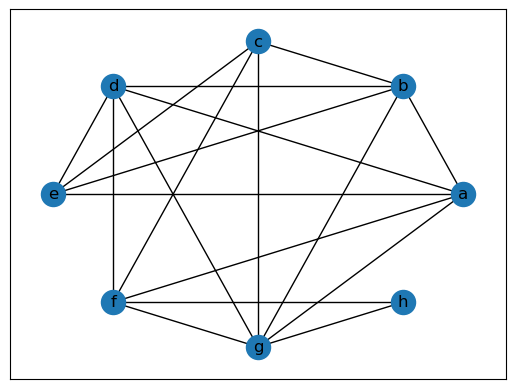

{'a': 0.13553854203828397,
 'b': 0.1356558734322666,
 'c': 0.11249708863600534,
 'd': 0.13553854203828397,
 'e': 0.11179991808164784,
 'f': 0.13981119843403209,
 'g': 0.16348089925170378,
 'h': 0.06567793808777656}

In [70]:
import itertools
import random

import networkx as nx
from matplotlib import pyplot as plt

nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# Generate Networkx Graph
G = nx.Graph()
G.add_nodes_from(nodes)

# randomly determine vertices
for (node1, node2) in itertools.combinations(nodes, 2):
    if random.random() < 0.5:
        G.add_edge(node1, node2)

# Draw generated graph
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)

# Compute Page Rank
pr = nx.pagerank(G, alpha=0.85)

plt.show()

pr

In [71]:
npg = nx.to_numpy_array(G)

In [72]:
npg

array([[0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0.]])

In [73]:
pr

{'a': 0.13553854203828397,
 'b': 0.1356558734322666,
 'c': 0.11249708863600534,
 'd': 0.13553854203828397,
 'e': 0.11179991808164784,
 'f': 0.13981119843403209,
 'g': 0.16348089925170378,
 'h': 0.06567793808777656}